### **Apple Stock Prediction using LSTM**

In [1]:
import pandas as pd

#### **importing csv file**

In [2]:
data = pd.read_csv("C:/Users/User/Downloads/AAPL.csv")

#### **previewing data**

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10948,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10948,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,50944900


#### **Selecting relevant columns**

In [10]:
data = data[['Date', 'Close']]

In [11]:
data.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [12]:
data['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10948    2024-05-17
10949    2024-05-20
10950    2024-05-21
10951    2024-05-22
10952    2024-05-23
Name: Date, Length: 10953, dtype: object

#### **Creating a function to convert strings to DateTime format**

In [13]:
from datetime import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime(year=year, month=month, day=day)


In [14]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

<ipython-input-14-4e6d772a2d0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10948   2024-05-17
10949   2024-05-20
10950   2024-05-21
10951   2024-05-22
10952   2024-05-23
Name: Date, Length: 10953, dtype: datetime64[ns]

In [15]:
data

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10948,2024-05-17,189.869995
10949,2024-05-20,191.039993
10950,2024-05-21,192.350006
10951,2024-05-22,190.899994


#### **Setting the Date column as the index**

In [16]:
data.set_index('Date', inplace=True)
data

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2024-05-17,189.869995
2024-05-20,191.039993
2024-05-21,192.350006


### **Visualization**

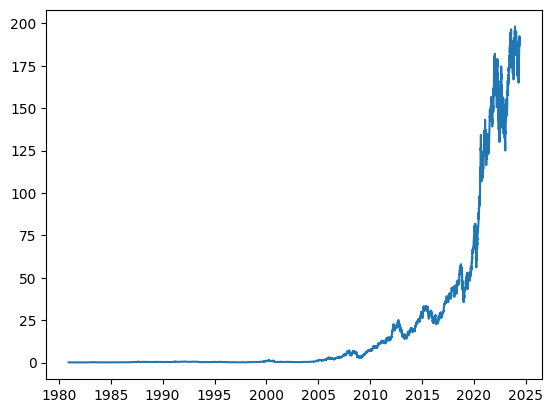

In [17]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

#### **Creating a function to make a modified dataframe**

In [18]:
from datetime import timedelta
import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)

    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]

  ret_data['Target'] = Y

  return ret_data


#### From visualising the data, we can see that price was ranging for a while before experiencing a huge spike. If we use all the data to train the model, the accuracy is gonna be poor. So Instead we are gonna use data after the huge spike to train and test the model.

In [44]:
windowed_data = data_to_windowed_data(data,
                                '2023-05-25',
                                '2024-05-23',
                                n=3)

windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-05-25,174.199997,171.559998,171.839996,172.990005
1,2023-05-26,171.559998,171.839996,172.990005,175.429993
2,2023-05-30,171.839996,172.990005,175.429993,177.300003
3,2023-05-31,172.990005,175.429993,177.300003,177.250000
4,2023-06-01,175.429993,177.300003,177.250000,180.089996
...,...,...,...,...,...
246,2024-05-17,187.429993,189.720001,189.839996,189.869995
247,2024-05-20,189.720001,189.839996,189.869995,191.039993
248,2024-05-21,189.839996,189.869995,191.039993,192.350006
249,2024-05-22,189.869995,191.039993,192.350006,190.899994


#### **Creating a function to convert our dataframe into numpy arrays**

In [45]:
def windowed_data_to_date_X_y(windowed_dataframe):
    data_as_np = windowed_dataframe.to_numpy()

    dates = data_as_np[:, 0]

    middle_matrix = data_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = data_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape


((251,), (251, 3, 1), (251,))

#### **Spliting our data into training, validation and testing partitions**

In [46]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

In [47]:
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

In [48]:
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

In [49]:
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

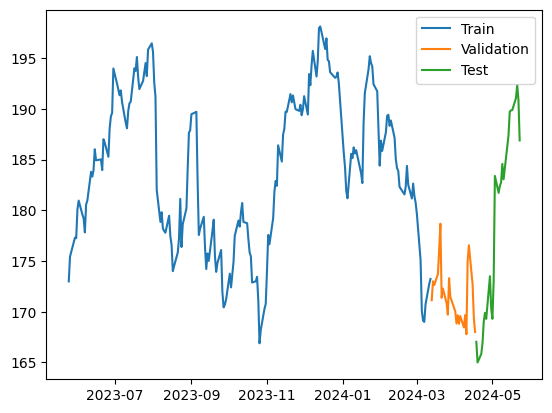

In [50]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

#### **Training our Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [51]:
model = Sequential([layers.Input((3, 1)), layers.LSTM(64), layers.Dense(32, activation='relu'), layers.Dense(32, activation='relu'), layers.Dense(1)])
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 86ms/step - loss: 33662.4961 - mean_absolute_error: 183.3139 - val_loss: 29093.9746 - val_mean_absolute_error: 170.5467
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 33416.3438 - mean_absolute_error: 182.6409 - val_loss: 28881.5195 - val_mean_absolute_error: 169.9227
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 33180.7383 - mean_absolute_error: 181.9939 - val_loss: 28629.5098 - val_mean_absolute_error: 169.1796
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 32881.1133 - mean_absolute_error: 181.1700 - val_loss: 28301.7559 - val_mean_absolute_error: 168.2081
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 32487.7500 - mean_absolute_error: 180.0800 - val_loss: 27879.5078 - val_mean_absolute_error: 166.9483
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 31996.5508 - mean_absolute_error: 178.7113 - val_loss: 27328.19

7/7 [==============================] - 0s 3ms/step


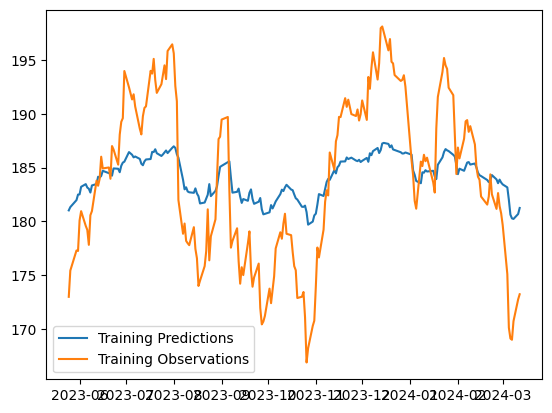

In [52]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 30ms/step


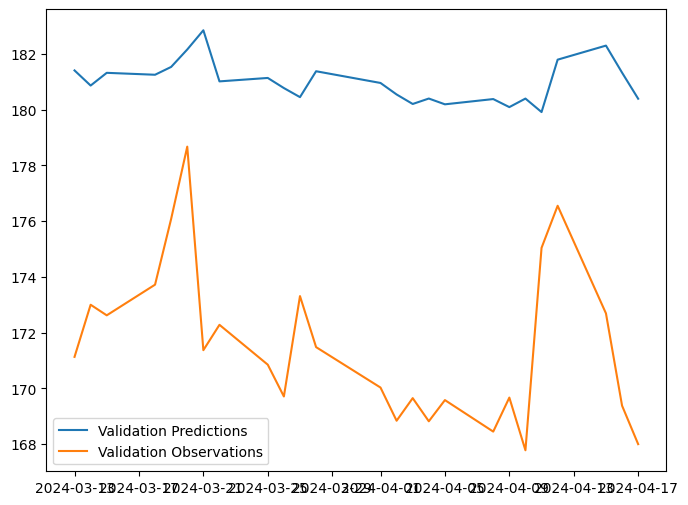

In [53]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(8, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 18ms/step


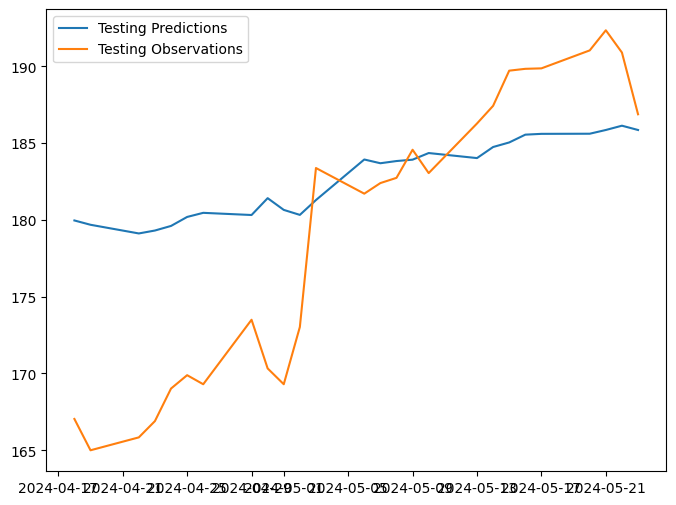

In [54]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(8, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

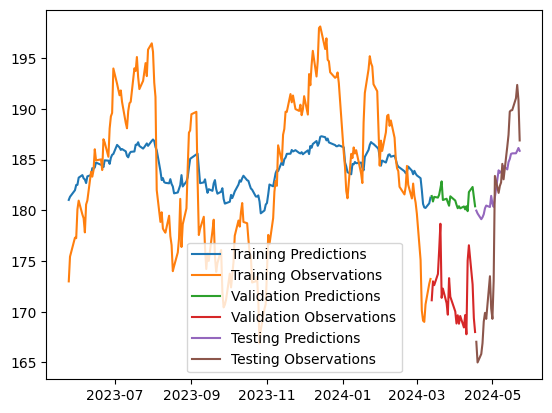

In [55]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'Validation Observations', 'Testing Predictions', 'Testing Observations'])



#### **Using our model to predict unseen variables**

In [56]:
from copy import deepcopy

In [64]:
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

In [65]:
for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


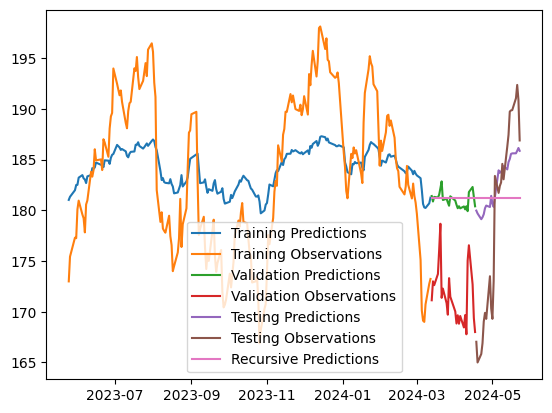

In [67]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.plot(recursive_dates, recursive_predictions)

plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'Validation Observations', 'Testing Predictions', 'Testing Observations', 'Recursive Predictions'])


### **Conclusion**

#### In conclusion, this project involved using a model to predict Apple stock prices. While the model provides valuable insights and demonstrates the potential of predictive analytics, it is important to note that it should not be the sole deciding factor in investment decisions